# Task 2 Approximating linear vector fields

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from calculation import *
from scipy.integrate import solve_ivp

## Part 1 Estimate the linear vector field that was used to generate the points $x_1$ from the points $x_0$

### Load the dataset and show the distribution

In [2]:
x0 = np.loadtxt('../data/linear_vectorfield_data_x0.txt')
x1 = np.loadtxt('../data/linear_vectorfield_data_x1.txt')

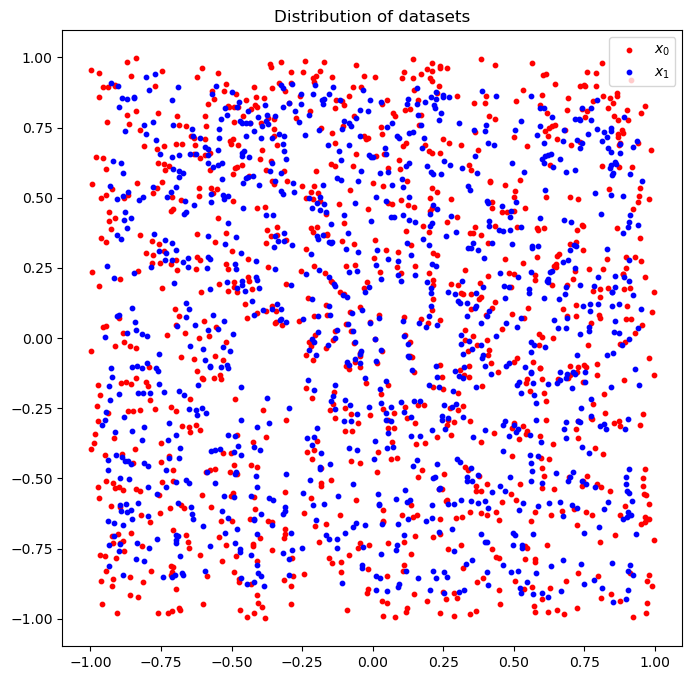

In [3]:
plt.figure(figsize=(8, 8))
plt.scatter(x0[:, 0], x0[:, 1], s=10, color='r', label='$x_0$')
plt.scatter(x1[:, 0], x1[:, 1], s=10, color='b', label='$x_1$')
plt.title("Distribution of datasets")
plt.legend()
plt.show()

### Estimate the vector v and approximate the matrix A

In [4]:
dt = 0.1  #Because it is a linear system, the best dt is not required
A,v = estimate_matrix(x0, x1, dt)
print('Estimate Matrix A:')
print(A)

Estimate Matrix A:
[[-0.49355245 -0.4638232 ]
 [ 0.23191153 -0.95737573]]


### Draw vector field based on vector v

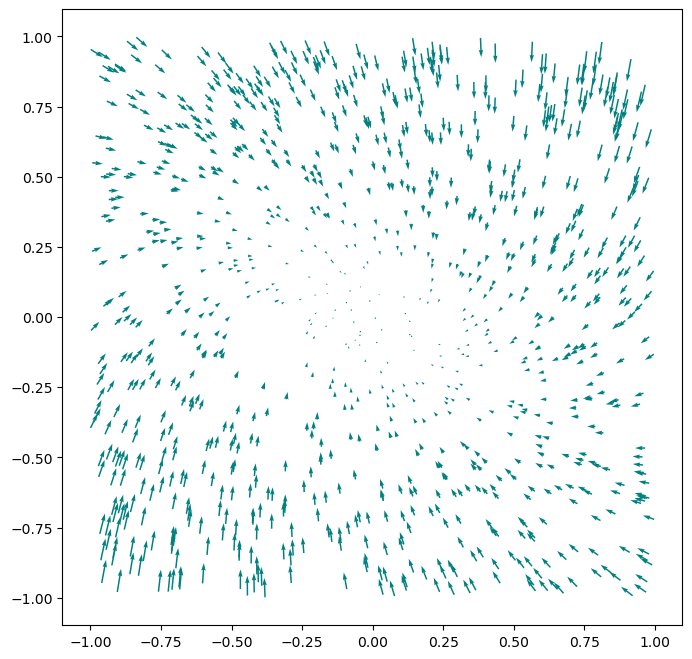

In [5]:
plt.figure(figsize=(8,8))
plt.quiver(x0[:,0], x0[:,1], v.T[0], v.T[1], color='teal')

## Part 2 Solve the linear system and compute the mean squared error

In [6]:
x1_pre = x1_pre_solve(x0, 0.1, A)
mse = np.linalg.norm(x1_pre - x1) **2 / len(x0) #Calculate the mean squared error (MSE)
print(f"MSE = {mse}")

MSE = 0.003059927595989735


##  Part 3 Choose the initial point (10, 10) and solve the linear system again, visualize trajectories and phase portrait 

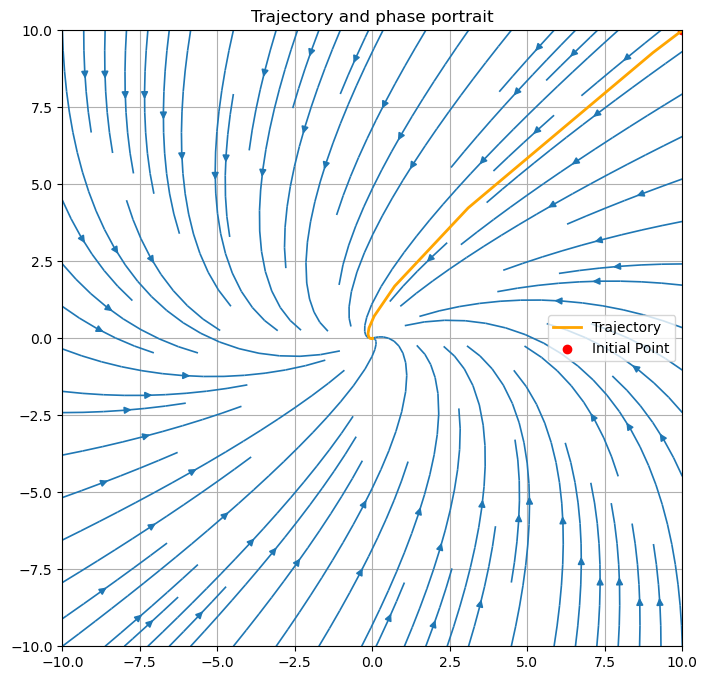

In [7]:
#Initialize coordinate system
x, y = np.meshgrid(np.linspace(-10, 10, 50), np.linspace(-10, 10, 50))
u, v = np.zeros_like(x), np.zeros_like(y)

u = A[0][0] * x + A[0][1] * y
v = A[1][0] * x + A[1][1] * y

initial_p = np.array([10, 10])#initial point (10, 10)

linear_system = lambda t, x, A: A @ x  # t:time (for solve_ivp), x:single point, A:estimate matrix 

# Solve the linear system using the estimated matrix A
sol = solve_ivp(linear_system, (0, 100), initial_p, method='RK45',args=[A])

# Plot the phase portrait with trajectory
fig = plt.figure(figsize=(8, 8))
plt.streamplot(x, y, u, v, linewidth=1.2) #phase portrait
plt.plot(sol.y[0,:],sol.y[1,:],linewidth=2, color='orange', label='Trajectory') #trajectory
plt.scatter(initial_p[0], initial_p[1], color='red', label='Initial Point') #initial point
plt.title('Trajectory and phase portrait')
plt.grid(True)
plt.legend()
plt.show()